<a href="https://www.kaggle.com/code/shreeyashah/regressionfromscratch?scriptVersionId=290675820" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [865]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# Importing the Libraries

In [866]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [867]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [917]:
# Randomly selecting 1000 rows to train our model
df = df.sample(n=1000, random_state=42)

In [869]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [870]:
df.shape

(1000, 10)

In [871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 20046 to 18609
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1000 non-null   float64
 1   latitude            1000 non-null   float64
 2   housing_median_age  1000 non-null   float64
 3   total_rooms         1000 non-null   float64
 4   total_bedrooms      793 non-null    float64
 5   population          1000 non-null   float64
 6   households          1000 non-null   float64
 7   median_income       1000 non-null   float64
 8   median_house_value  1000 non-null   float64
 9   ocean_proximity     1000 non-null   object 
dtypes: float64(9), object(1)
memory usage: 85.9+ KB


In [872]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.00000,1000.000000,793.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-119.470920,35.525890,28.94100,2633.579000,530.947037,1414.489000,496.880000,3.936266,209696.547000
std,1.968387,2.114536,12.28953,2107.160411,400.451891,1033.306767,361.779353,2.021435,116431.309948
min,-124.150000,32.550000,2.00000,18.000000,3.000000,8.000000,5.000000,0.683100,30000.000000
25%,-121.700000,33.930000,18.75000,1456.750000,302.000000,802.000000,281.000000,2.625000,125525.000000
50%,-118.430000,34.200000,30.00000,2155.500000,434.000000,1174.500000,409.500000,3.502250,181600.000000
75%,-118.010000,37.620000,37.00000,3191.500000,650.000000,1704.250000,603.000000,4.735850,271150.000000
max,-114.590000,41.790000,52.00000,21897.000000,3513.000000,8652.000000,3589.000000,15.000100,500001.000000


## Train Test Split

In [920]:
# Using only 4 features for simplicity: median_income, total_rooms, population , households 
X = df.loc[:, ['median_income','total_rooms', 'population','households']]
y = df.loc[:, 'median_house_value']

In [874]:
# Spliting data into 80% training set and 20% test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

## Exploratory Data Analysis

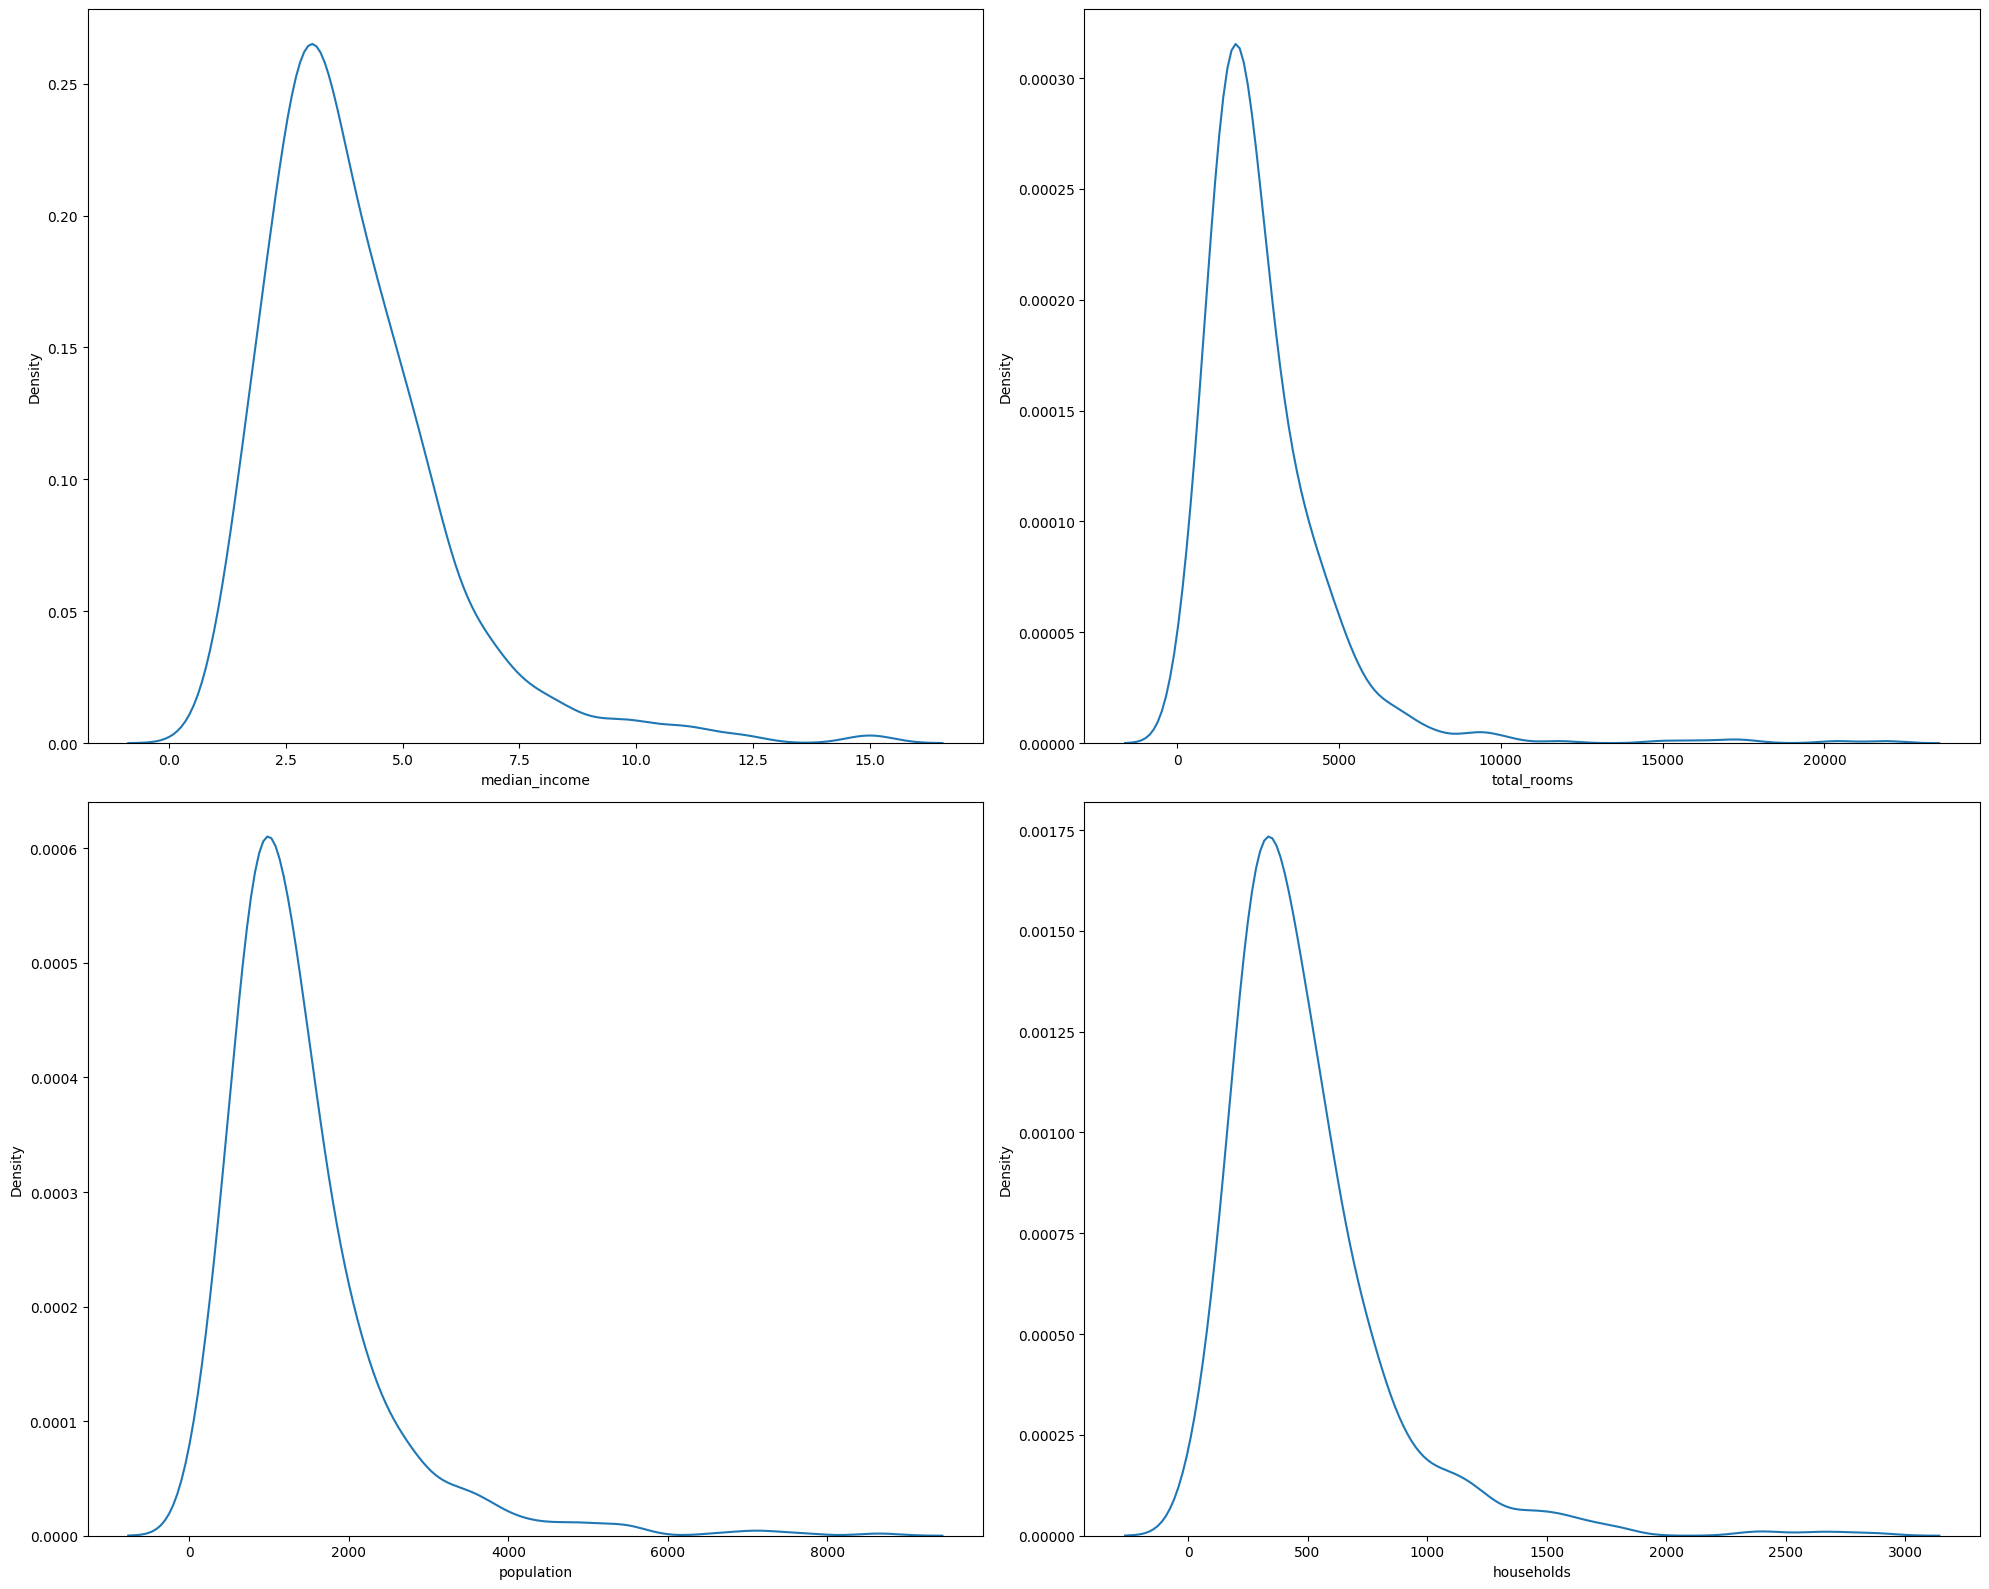

In [875]:
fig, axs = plt.subplots(2, 2, figsize=(20,16))
sns.kdeplot(x=X_train['median_income'], ax=axs[0,0])
sns.kdeplot(x=X_train['total_rooms'], ax = axs[0,1])
sns.kdeplot(x=X_train['population'], ax = axs[1,0])
sns.kdeplot(x=X_train['households'], ax = axs[1,1])

plt.tight_layout()
plt.show()

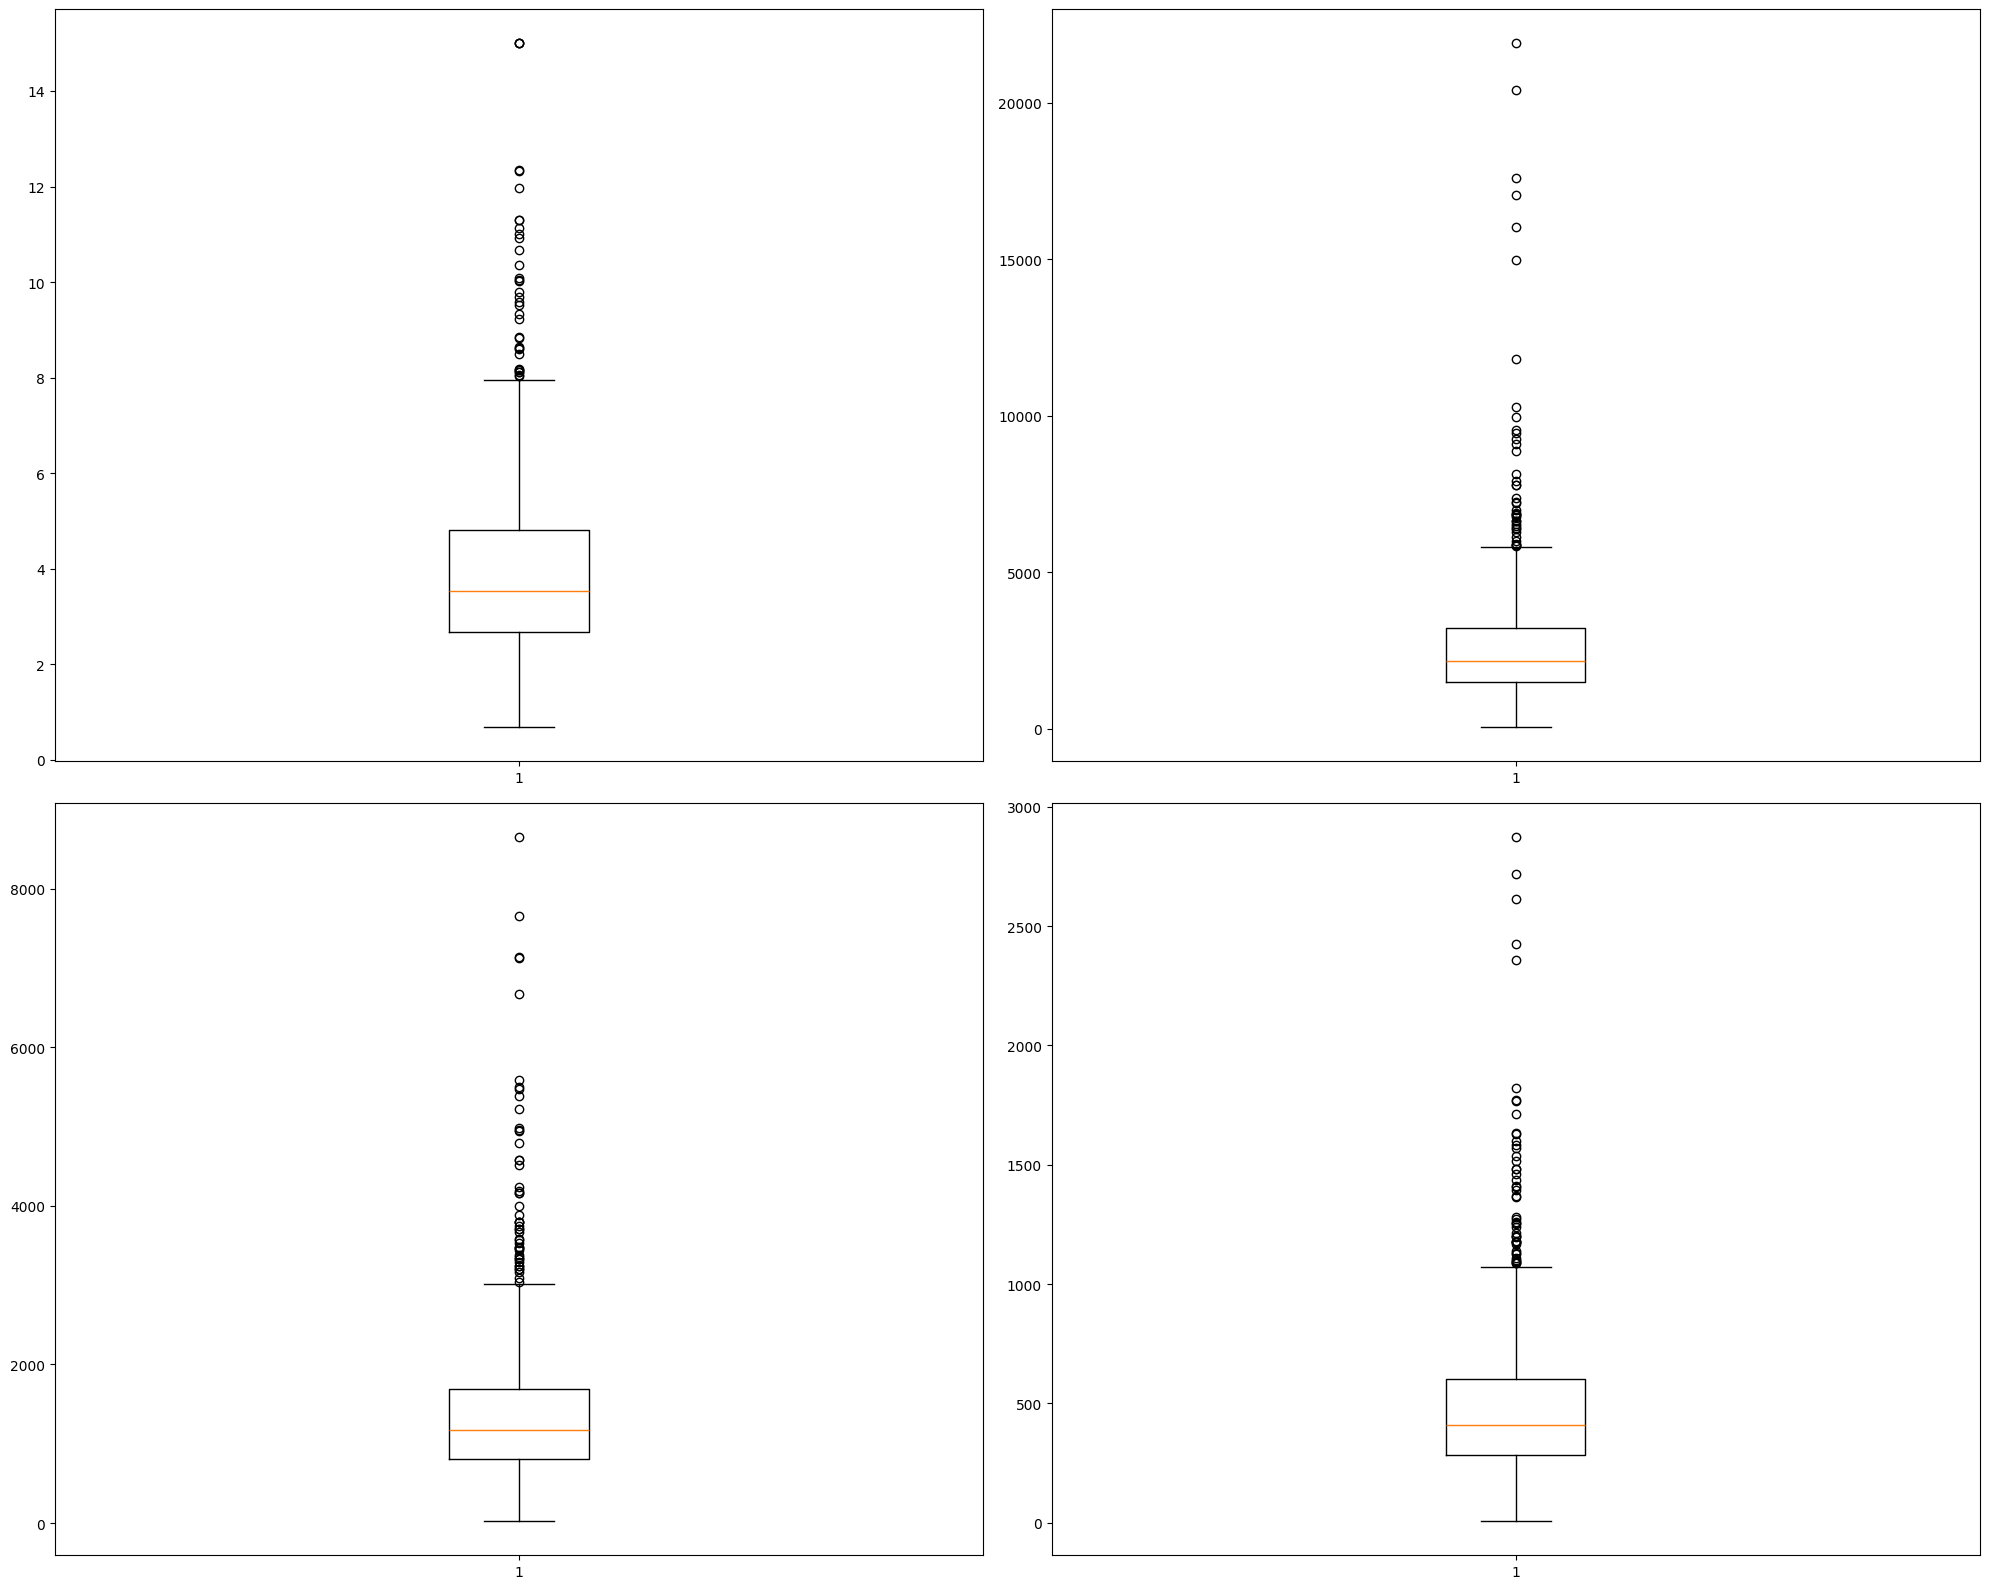

In [876]:
fig, axs = plt.subplots(2, 2, figsize=(20,16))
axs[0,0].boxplot(X_train['median_income'])
axs[0,1].boxplot(X_train['total_rooms'])
axs[1,0].boxplot(X_train['population'])
axs[1,1].boxplot(X_train['households'])

plt.tight_layout()
plt.show()

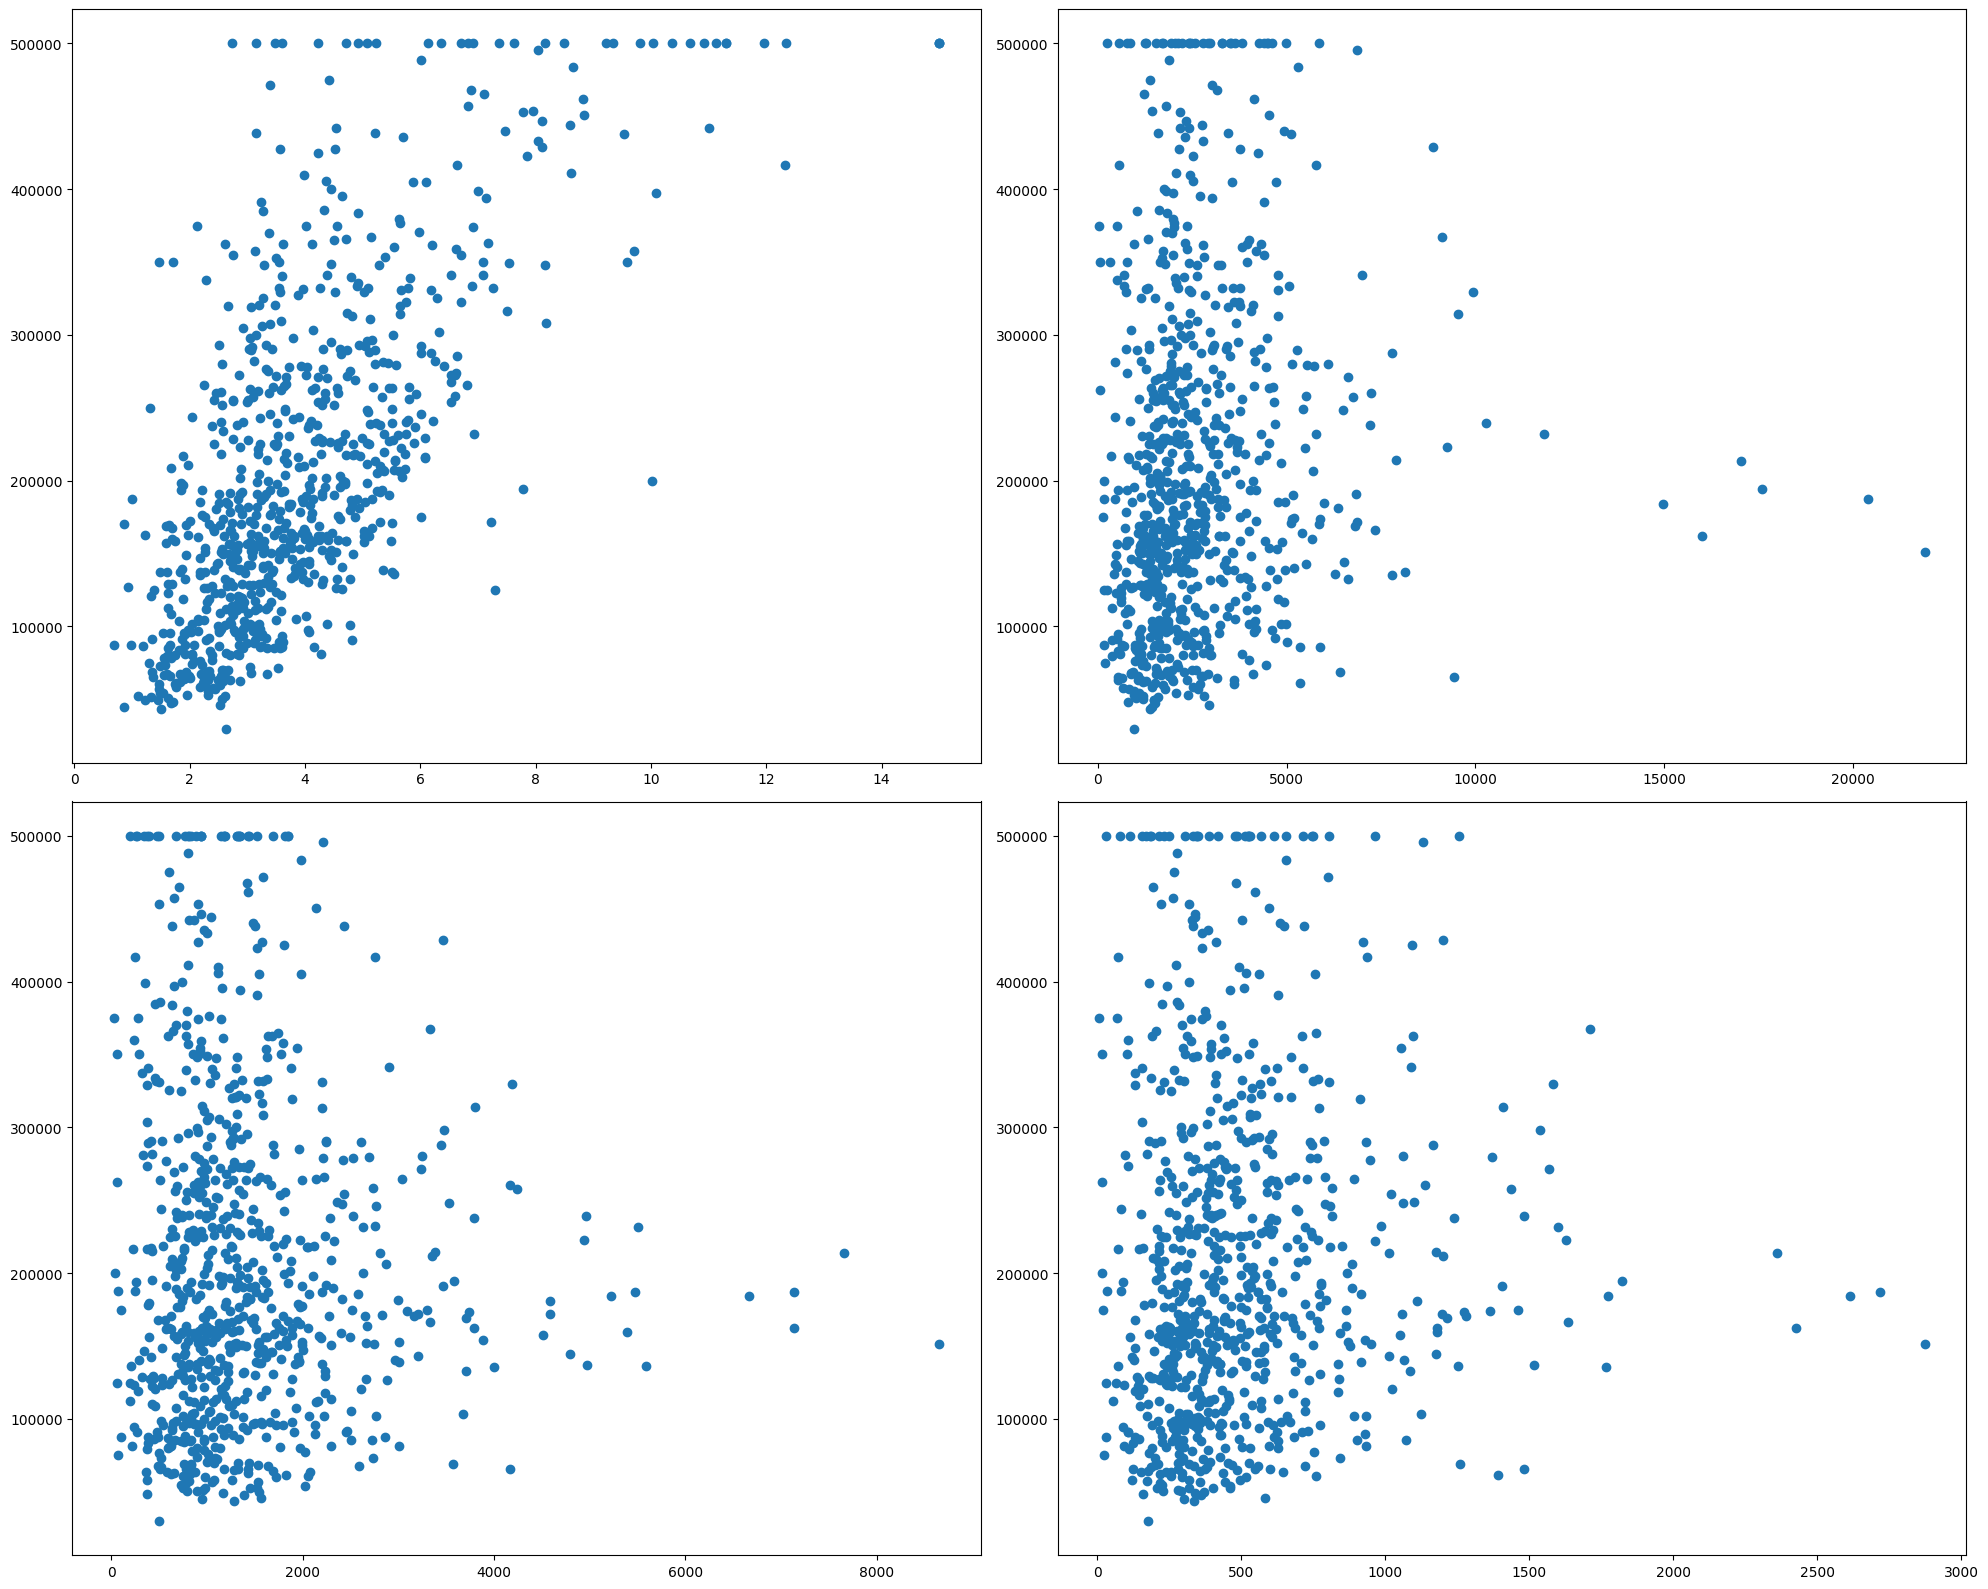

In [877]:
fig, axs = plt.subplots(2, 2, figsize=(20,16))
axs[0,0].scatter(X_train['median_income'], y_train)
axs[0,1].scatter(X_train['total_rooms'], y_train)
axs[1,0].scatter(X_train['population'], y_train)
axs[1,1].scatter(X_train['households'], y_train)

plt.tight_layout()
plt.show()

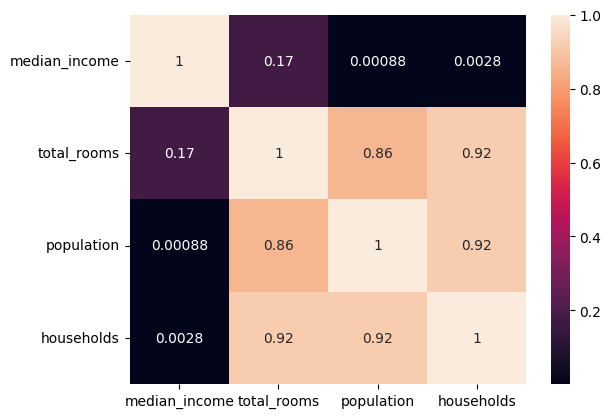

In [878]:
sns.heatmap(X_train.corr(), annot=True)
plt.show()

<Figure size 600x400 with 0 Axes>

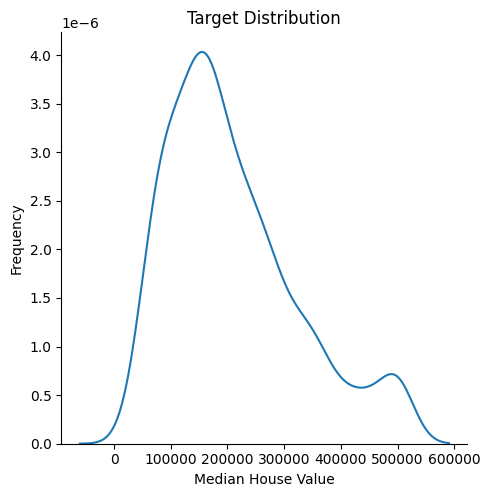

In [879]:
plt.figure(figsize=(6,4))
sns.displot(y_train, kind='kde')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Target Distribution")
plt.show()

In [918]:
# The independent Variables are skewed and there seems to be some non linear relationship with the target variable.
# Hence, taking polynomial features of degree 2
# Power Trasformer to reduce the skew in data
# Robust Scaler to scale the numerical data and handle outliers

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, PowerTransformer
from sklearn.pipeline import Pipeline

log_and_scale = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("log", PowerTransformer()),
    ("scaler", RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", log_and_scale, X_train.columns)
    ],
    remainder="drop"
)

pipe = Pipeline([
    ("preprocessor", preprocessor)
])

In [919]:
X_train_transformed = pipe.fit_transform(X_train, y_train)
X_train_transformed

array([[ 0.07141791,  1.12641379,  1.58878172, ...,  1.58982395,
         1.69568007,  1.62736903],
       [-0.09199149,  0.93609047,  1.29647318, ...,  1.29715728,
         1.38712933,  1.33771296],
       [-0.01772708, -0.43635056, -0.82821351, ..., -0.82795772,
        -0.78515617, -0.66641321],
       ...,
       [-0.21146501, -0.34843886, -0.55043544, ..., -0.55031253,
        -0.68242722, -0.74022487],
       [ 0.04876351, -1.26043366, -1.07146654, ..., -1.07106995,
        -1.26066209, -1.32096753],
       [ 0.75176417, -0.06635232, -0.22311565, ..., -0.22309171,
        -0.31328143, -0.36544241]])

In [883]:
X_test_transformed = pipe.transform(X_test)
X_test_transformed

array([[-0.32730494, -0.01880583,  0.06026308, ...,  0.06026322,
         0.26562446,  0.45441213],
       [ 0.73308567, -1.18296809, -1.22684188, ..., -1.22635044,
        -1.29774083, -1.24717069],
       [ 1.03627531,  0.96335197,  0.78255774, ...,  0.78279552,
         0.77560805,  0.69544961],
       ...,
       [-1.15929169, -0.48110678, -0.40386952, ..., -0.40379962,
        -0.19443283,  0.04287591],
       [ 1.02217054,  0.42390409,  0.3666422 , ...,  0.36668887,
         0.16512721, -0.03735757],
       [ 0.18869818,  0.41562189,  0.01767538, ...,  0.01767513,
         0.26406681,  0.49669792]])

## Linear Regression

In [884]:
class LinearRegressor:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)
        B = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = B[0]
        self.coef_ = B[1:]

    def predict(self, X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [885]:
lr = LinearRegressor()
lr.fit(X_train_transformed, y_train)
y_pred = lr.predict(X_test_transformed)

In [886]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6017866195425093

In [887]:
lr.coef_

array([  -371564.68522092,  32645655.91956537,  -1738063.20337008,
        -5978266.25561888,    252093.97165585,    507273.10818542,
          -66083.04494258,     37999.4607676 , -32737938.93282808,
        -1315714.69236901,    708119.71174517,   2317063.31104288,
           45267.24634389,   5738912.90318066])

In [888]:
lr.intercept_

np.float64(212893.96480512136)

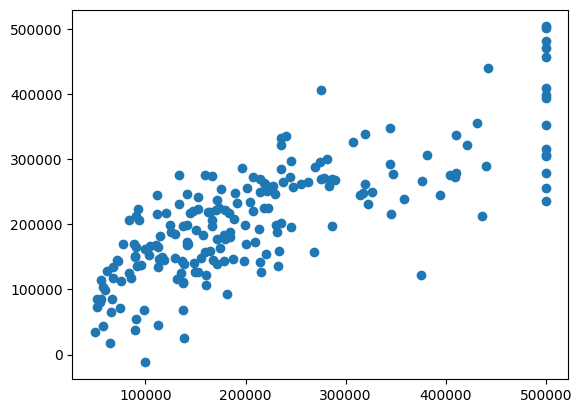

In [889]:
plt.scatter(y_test, y_pred)

In [890]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred = lr.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.6017866203538909

In [891]:
lr.coef_

array([  -371564.68470417,  32645655.73655406,  -1738063.37558302,
        -5978266.15300548,    252093.97121664,    507273.10757492,
          -66083.04539571,     37999.46145657, -32737938.74841585,
        -1315714.68821884,    708119.70572167,   2317063.48257511,
           45267.24438131,   5738912.80425647])

In [892]:
lr.intercept_

np.float64(212893.96484673914)

## Batch Gradient Descent

In [893]:
class BatchGDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis =1)
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            y_hat = np.dot(X_train,self.coef_) 
            coef_der = -2 * np.dot((y_train - y_hat),X_train) / X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [894]:
bgd = BatchGDRegressor()
bgd.fit(X_train_transformed, y_train)
y_pred = bgd.predict(X_test_transformed)

In [896]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4001834993321145

In [897]:
bgd.coef_

array([ 34165.79873359,  -1613.60534115, -15553.91420558,   3698.75603736,
        33287.59194589,  19392.43097981,   8626.87932378,  20507.2286361 ,
        -1595.83677807,  -5500.95516958,   4373.64785971, -15522.32991427,
        -6703.39158497,   3792.27433337])

In [898]:
bgd.intercept_

np.float64(180915.59502416934)

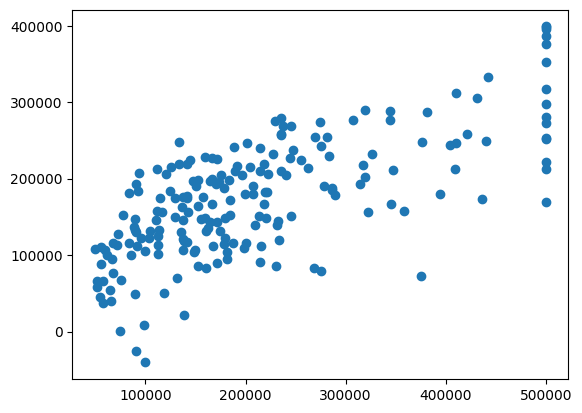

In [899]:
plt.scatter(y_test, y_pred)

## Stochastic Gradient Descent

In [900]:
class SGDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        self.intercept_ = 0.0
        self.coef_ = np.zeros(X_train.shape[1])
        n = X_train.shape[0]

        for _ in range(self.epochs):
            indices = np.random.permutation(n)
            for idx in indices:
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_

                intercept_der = -2 * (y_train.iloc[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train.iloc[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [901]:
sgd = SGDRegressor()
sgd.fit(X_train_transformed, y_train)
y_pred = sgd.predict(X_test_transformed)

In [902]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5044589507421922

In [903]:
sgd.coef_

array([ -59078.1603032 ,  -61159.86911851,   23430.01855132,
         69887.5883858 ,  -10504.69770295,  324843.55910153,
        -48021.43449046,  141326.05284451,  -64095.36806176,
       -188898.14654904, -115425.22178971,   22320.0991708 ,
        -13675.95768391,   63975.77406018])

In [904]:
sgd.intercept_

np.float64(202713.3437904386)

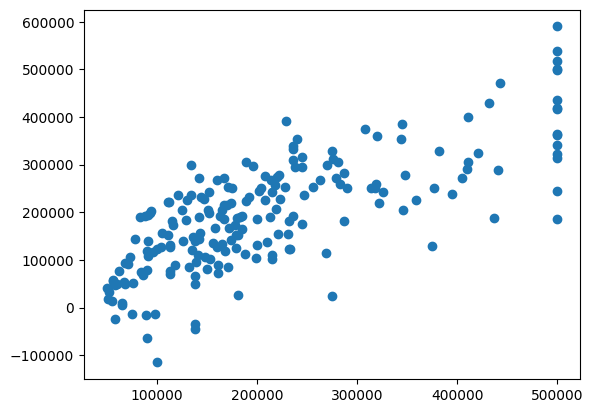

In [905]:
plt.scatter(y_test, y_pred)

In [906]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

sgd = SGDRegressor()
sgd.fit(X_train_transformed, y_train)
y_pred = sgd.predict(X_test_transformed)
r2_score(y_test, y_pred)

0.539582638313191

In [907]:
sgd.coef_

array([ 28571.31017129, -31879.82206455, -37592.9761    ,  41920.52998147,
        28073.34247073,  23151.14188295,   9451.30826995,  70968.70555399,
       -31931.78597174, -35428.55447354,   5557.79399042, -37619.2351541 ,
         -409.43114681,  41858.22308353])

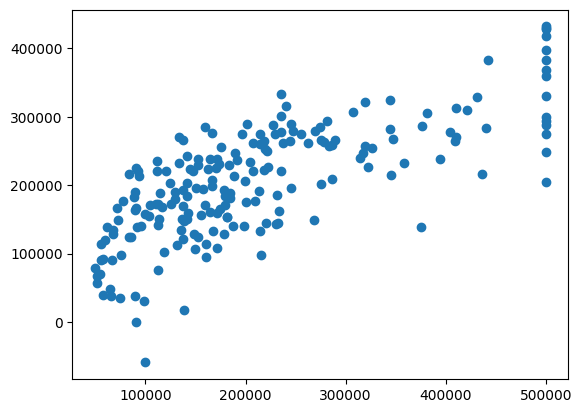

In [908]:
plt.scatter(y_test, y_pred)

## Ridge Redression

In [909]:
class RidgeRegressor:
    def __init__(self, learning_rate = 0.1, epochs = 100, alpha = 0.1):
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)
        self.coef_ = np.ones(X_train.shape[1])
        XtX = np.dot(X_train.T , X_train)
        Xty = np.dot(X_train.T , y_train)
        n = X_train.shape[0]
        for i in range(self.epochs):
            grad = (2 / n) * (XtX.dot(self.coef_) - Xty)
            grad[1:] += 2*self.alpha*self.coef_[1:]
            self.coef_ -= self.lr * grad
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [910]:
ridge = RidgeRegressor()
ridge.fit(X_train_transformed, y_train)
y_pred = ridge.predict(X_test_transformed)

In [911]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.516392434944655

In [912]:
ridge.coef_

array([ 32189.1858617 , -10048.43706212, -23344.50726904,  18482.41553538,
        31862.15810668,  17110.93888542,   6638.13163043,  37755.47935104,
       -10070.34209089, -17120.57653901,   3854.61472006, -23363.71447448,
        -3146.5636337 ,  18448.89682798])

In [913]:
ridge.intercept_

np.float64(208513.0032027982)

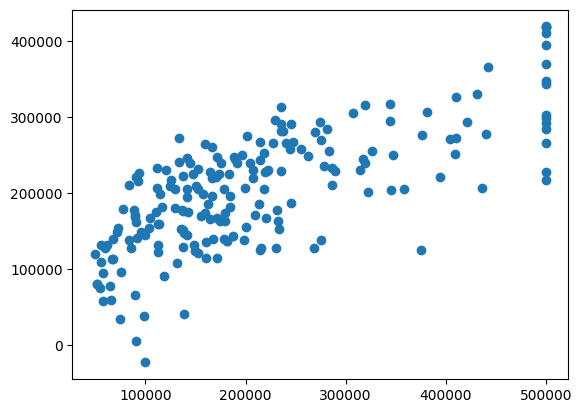

In [914]:
plt.scatter(y_test, y_pred)

In [915]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_transformed, y_train)
y_pred = ridge.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.5679815953811156

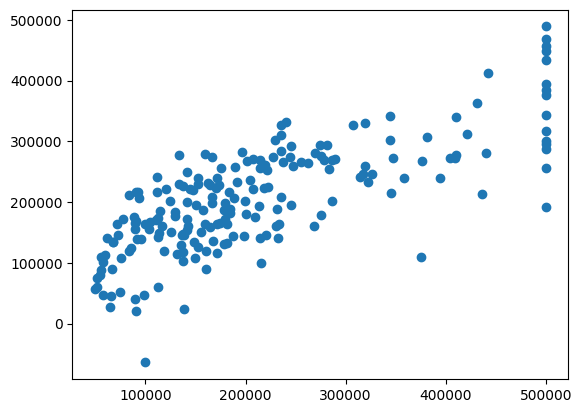

In [916]:
plt.scatter(y_test, y_pred)